### Mean Encoding with Pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
ds = pd.read_csv('train.csv',usecols=[ 'Sex', 'Embarked', 'Survived'])

In [7]:
ds.head()

,Survived,Sex,Embarked
0,0,male,S
1,1,female,C
2,1,female,S
3,1,female,S
4,0,male,S


In [12]:
# let's fill NaN in Embarked column

ds['Embarked'].fillna('Missing', inplace=True)

In [13]:
# Lets have a look at number of unique categories for each feature
for column in ds.columns:
  print(f"column {column} has {len(ds[column].unique())} unique categories")

column Survived has 2 unique categories
column Sex has 2 unique categories
column Embarked has 4 unique categories


In [14]:
# let's have a look at unique labels
ds['Sex'].unique()

array(['male', 'female'], dtype=object)

In [15]:
ds['Embarked'].unique()

array(['S', 'C', 'Q', 'Missing'], dtype=object)

### Note:
We calculate the target mean per category using the train set, and then use those mappings in the test set.

Note that for the pandas implementation we need to keep the target in the training set.

In [16]:
# Let's split train and test set
X_train, X_test, y_train, y_test = train_test_split(
    ds[['Sex', 'Embarked', 'Survived']],  # this time we keep the target!!
    ds['Survived'],  # target
    test_size=0.3,  # percentage of observation in test set
    random_state=10)  # seed to ensure reproducibility

# let's print the shape
X_train.shape, X_test.shape

((623, 3), (268, 3))

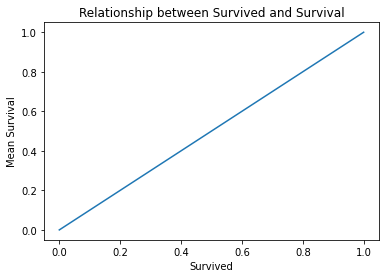

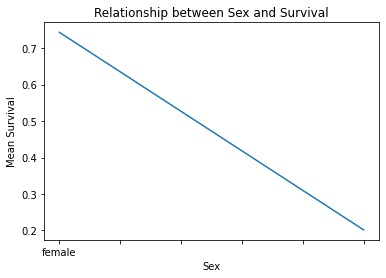

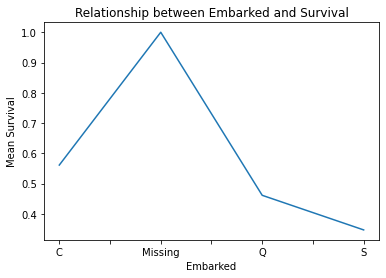

In [17]:
# let's plot the relationship of the categories with the target
for var in ds.columns.to_list():
    fig = plt.figure()
    fig = X_train.groupby([var])['Survived'].mean().plot()
    fig.set_title('Relationship between {} and Survival'.format(var))
    fig.set_ylabel('Mean Survival')
    plt.show()

We can see that the relation between target and embarked column goes up and down depending on the categories

In [20]:
# lets calculate the mean target value per category for Embarked and store the
# result in dictionary
ordered_labels=X_train.groupby(['Embarked'])['Survived'].mean().to_dict()

In [21]:
# lets check the dictionary 
print(ordered_labels)

{'C': 0.5614035087719298, 'Missing': 1.0, 'Q': 0.46153846153846156, 'S': 0.34725274725274724}


In [22]:
# now we replace the labels of Embarked with the respective target mean
X_train['Embarked'] = X_train['Embarked'].map(ordered_labels)
X_test['Embarked'] = X_test['Embarked'].map(ordered_labels)

In [27]:
# Lets observe the result
X_train.head()

,Sex,Embarked,Survived
7,male,0.347253,0
765,female,0.347253,1
339,male,0.347253,0
374,female,0.347253,0
183,male,0.347253,1


In [29]:
# lets combine the above two methods in functions so that we can use them
# to encode all the categorical features
def func_generate_map(ds, feature,target):
  return ds.groupby([feature])[target].mean().to_dict()

def func_encode( X_train, X_test, feature, ordinal_mapping):
  X_train[feature] = X_train[feature].map(ordinal_mapping)
  X_test[feature] = X_test[feature].map(ordinal_mapping)

In [30]:
# now lets use the functions to encode Sex column
mapping = func_generate_map(ds, 'Sex', 'Survived')
func_encode(X_train, X_test, 'Sex', mapping)

In [37]:
# lets check the result
print(X_train.head())
print("\n\n\n\n")
print(X_test.head())

          Sex  Embarked  Survived
7    0.188908  0.347253         0
765  0.742038  0.347253         1
339  0.188908  0.347253         0
374  0.742038  0.347253         0
183  0.188908  0.347253         1





          Sex  Embarked  Survived
590  0.188908  0.347253         0
131  0.188908  0.347253         0
628  0.188908  0.347253         0
195  0.742038  0.561404         1
230  0.742038  0.347253         1


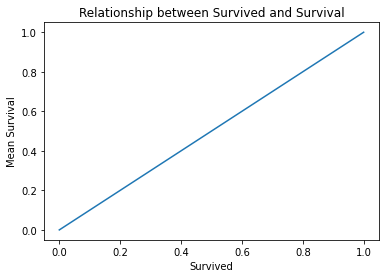

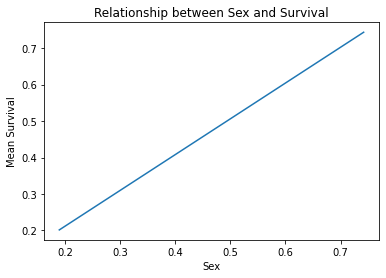

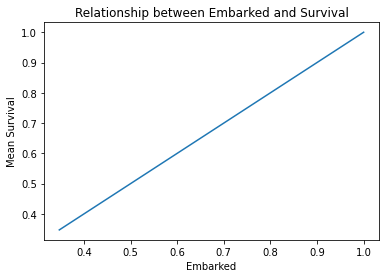

In [38]:
# let's plot the relationship of the categories with the target after encoding
for var in ds.columns.to_list():
    fig = plt.figure()
    fig = X_train.groupby([var])['Survived'].mean().plot()
    fig.set_title('Relationship between {} and Survival'.format(var))
    fig.set_ylabel('Mean Survival')
    plt.show()

As we can see that the relation between the features and the target is now linear. This is what Mean Encoding does.

### Advantages
- quick
- returns pandas dataframe

### Limitations of pandas:
- it does not preserve information from train data to propagate to test data
- We need to store the mappings separately if planning to use the model in production.

### Note
Replacing categorical labels with this code and method will generate missing values for categories present in the test set that were not seen in the training set. Therefore it is extremely important to handle rare labels before-hand. 